In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
df_world = pd.read_csv('world_data1.csv')
df_world

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,...,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
0,Afghanistan,1.0,1.0,1.0,3.0,62.0,3.0,2.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,pt
1,Afghanistan,2.0,1.0,3.0,4.0,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
2,Afghanistan,1.0,2.0,1.0,1.0,28.0,1.0,1.0,NaN,NaN,...,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,1.0,en
3,Afghanistan,1.0,1.0,2.0,3.0,26.0,1.0,2.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
4,Afghanistan,1.0,2.0,2.0,2.0,30.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,NaN,1.0,1.0,1.0,2.0,22.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
31208,NaN,1.0,1.0,1.0,2.0,25.0,1.0,2.0,NaN,NaN,...,4.0,3.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,en
31209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
31210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en


In [3]:
df_world.drop(df_world.index[30900:],inplace=True)
df_world.tail()

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,...,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
30895,Uzbekistan,1.0,1.0,1.0,2.0,19.0,1.0,2.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
30896,Uzbekistan,1.0,1.0,1.0,2.0,21.0,2.0,2.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
30897,Uzbekistan,1.0,1.0,1.0,3.0,35.0,4.0,2.0,2.0,2.0,...,5.0,5.0,4.0,5.0,5.0,3.0,3.0,1.0,1.0,en
30898,Uzbekistan,1.0,1.0,1.0,2.0,20.0,2.0,2.0,3.0,4.0,...,1.0,1.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,en
30899,Uzbekistan,1.0,1.0,1.0,2.0,20.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en


In [4]:
pd.set_option('display.max_columns', None)
df_world.head()

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q10c,Q10d,Q10e,Q11,Q12a,Q12b,Q12c,Q12d,Q12e,Q13,Q14a,Q14b,Q14c,Q14d,Q14e,Q15,Q16a,Q16b,Q16c,Q16d,Q16e,Q17,Q18a,Q18b,Q18c,Q19a,Q19b,Q19c,Q19d,Q19e,Q19f,Q19g,Q19h,Q19i,Q20a,Q20b,Q20c,Q20d,Q20e,Q20f,Q21a,Q21b,Q21c,Q21d,Q21e,Q21f,Q21g,Q21h,Q21i,Q21j,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q23a,Q23b,Q23c,Q23d,Q23e,Q23f,Q23g,Q23h,Q23i,Q23j,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q24h,Q25a,Q25b,Q25c,Q25d,Q25e,Q25f,Q25g,Q25h,Q25i,Q25j,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26j,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35a,Q35b,Q35c,Q35d,Q36a,Q36b,Q36c,Q36d,Q36e,Q36f,Q36g,Q36h,Q36i,Q36j,Q37,Q38a_1,Q38b_1,Q38c_1,Q38d_1,Q38e_1,Q38f_1,Q38g_1,Q38h_1,Q38i_1,Q38j_1,Q38k_1,Q38l_1,Q38m_1,Q38n_1,Q38o_1,Q38p_1,Q38a_2,Q38b_2,Q38c_2,Q38d_2,Q38e_2,Q38f_2,Q38g_2,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
0,Afghanistan,1.0,1.0,1.0,3.0,62.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,2.0,1.0,1.0,3.0,5.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,5.0,1.0,5.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,4.0,2.0,5.0,1.0,6.0,6.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,NaN,1.0,1.0,1.0,2.0,NaN,3.0,1.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,3.0,5.0,5.0,4.0,2.0,5.0,5.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,pt
1,Afghanistan,2.0,1.0,3.0,4.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
2,Afghanistan,1.0,2.0,1.0,1.0,28.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,3.0,4.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,1.0,en
3,Afghanistan,1.0,1.0,2.0,3.0,26.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
4,Afghanistan,1.0,2.0,2.0,2.0,30.0,1.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,5.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,6.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,7.0,7.0,7.0,7.0,3.0,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,NaN,3.0,2.0,3.0,4.0,5.0

In [5]:
df_world = df_world.replace([1.0],'Strongly Disagree')
df_world = df_world.replace([2.0],'Disagree')
df_world = df_world.replace([3.0],'Neutral')
df_world = df_world.replace([4.0],'Agree')
df_world = df_world.replace([5.0],'Strongly Agree')

In [157]:
df_world['Q17'] = df_world['Q17'].replace(['Strongly Disagree'],'significantly smaller')
df_world['Q17'] = df_world['Q17'].replace(['Disagree'],'smaller')
df_world['Q17'] = df_world['Q17'].replace(['Neutral'],'the same')
df_world['Q17'] = df_world['Q17'].replace(['Agree'],'larger')
df_world['Q17'] = df_world['Q17'].replace(['Strongly Agree'],'significantly larger')

It is more difficult for me to focus during online teaching in comparison to on-site teaching.

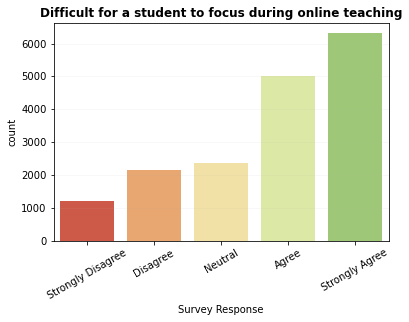

In [152]:
#because it is difficult to focus during online classes, the performance of students has drstically declined
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q20a',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.title('Difficult for a student to focus during online teaching',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Difficult for a student to focus during online teaching.png',dpi=300,bbox_inches='tight')
plt.show()

My performance as a student has improved since on-site classes were cancelled.

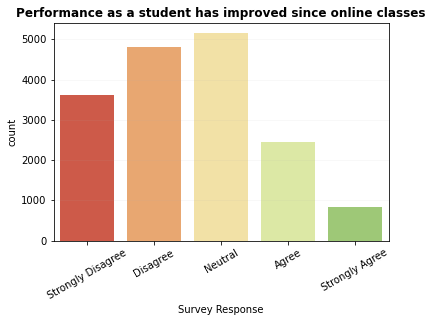

In [162]:
sns.countplot(x='Q20b',data=df_world, order = sort)
plt.xticks(rotation=30)
plt.title('Performance as a student has improved since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Performance of a student has improved since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

On average, compared to the workload before on-site classes were cancelled, would you say that your study workload over the last weeks has been

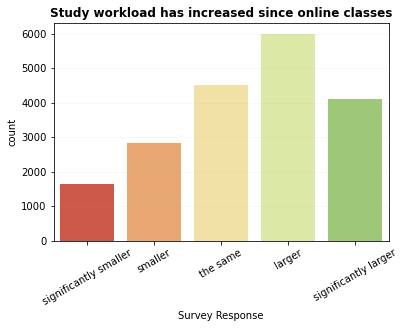

In [154]:
sort1 = ['significantly smaller','smaller','the same','larger','significantly larger']
sns.countplot(x='Q17',data=df_world, order = sort1)
plt.xticks(rotation=30)
plt.title('Study workload has increased since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Study workload has increased since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

My performance as a student has worsen since on-site classes were cancelled.

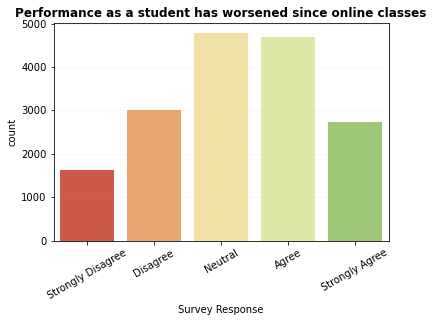

In [156]:
sns.countplot(x='Q20c',data=df_world, order=sort)
plt.xticks(rotation=30)
plt.title('Performance as a student has worsened since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Performance as a student has worsened since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

I have adapted well to the new teaching and learning experience.

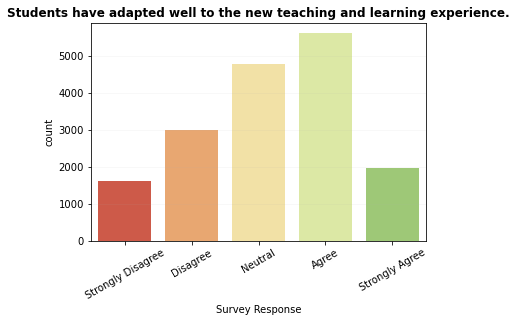

In [159]:
sns.countplot(x='Q20d',data=df_world,order=sort)
plt.xticks(rotation=30)
plt.title('Students have adapted well to the new teaching and learning experience.',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Students have adapted well to the new teaching and learning experience.png',dpi=300,bbox_inches='tight')
plt.show()

I can master the skills taught in class this year even though on- site classes were cancelled.

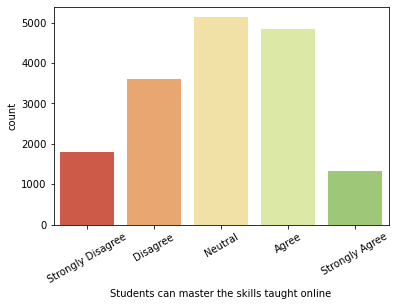

In [98]:
sns.countplot(x='Q20e',data=df_world,order=sort)
plt.xticks(rotation=30)
plt.xlabel('Students can master the skills taught online')
plt.show()

I can figure out how to do the most difficult classwork since on-site classes were cancelled.

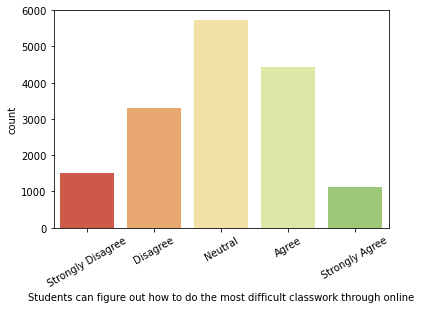

In [101]:
sns.countplot(x='Q20f',data=df_world,order=sort)
plt.xticks(rotation=30)
plt.xlabel('Students can figure out how to do the most difficult classwork through online')
plt.show()

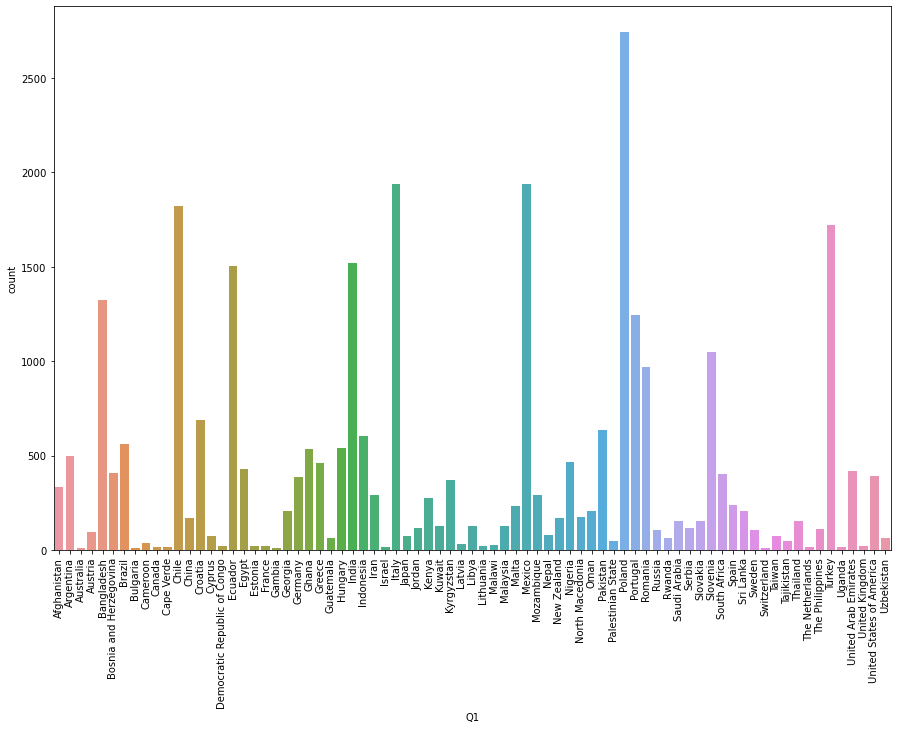

In [103]:
sns.countplot(x='Q1',data=df_world)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 10)
plt.show()

In [56]:
a = df_world.groupby(['Q1', 'Q20a'], as_index=False).size()
pd.set_option('display.max_rows', None)
a

,Q1,Q20a,size
0,Afghanistan,Agree,34
1,Afghanistan,Disagree,9
2,Afghanistan,Neutral,19
3,Afghanistan,Strongly Agree,26
4,Afghanistan,Strongly Disagree,8
5,Argentina,Agree,76
6,Argentina,Disagree,20
7,Argentina,Neutral,32
8,Argentina,Strongly Agree,142
9,Argentina,Strongly Disagree,35


In [45]:
Q_20a_SD = a[a['Q20a']=='Strongly Disagree']
Q_20a_D = a[a['Q20a']=='Disagree']
Q_20a_N = a[a['Q20a']=='Neutral']
Q_20a_A = a[a['Q20a']=='Agree']
Q_20a_SA = a[a['Q20a']=='Strongly Agree']

In [64]:
df2 = df_world.groupby(['Q1','Q20a'])['Q1'].count().unstack('Q20a')
df2

Q20a,Agree,Disagree,Neutral,Strongly Agree,Strongly Disagree
Q1,,,,,
Afghanistan,34.0,9.0,19.0,26.0,8.0
Argentina,76.0,20.0,32.0,142.0,35.0
Australia,2.0,NaN,NaN,3.0,NaN
Austria,8.0,8.0,4.0,21.0,3.0
Bangladesh,246.0,38.0,66.0,75.0,12.0
Bosnia and Herzegovina,72.0,39.0,35.0,73.0,21.0
Brazil,42.0,20.0,18.0,139.0,25.0
Bulgaria,2.0,3.0,2.0,3.0,NaN
Cameroon,1.0,NaN,1.0,9.0,NaN


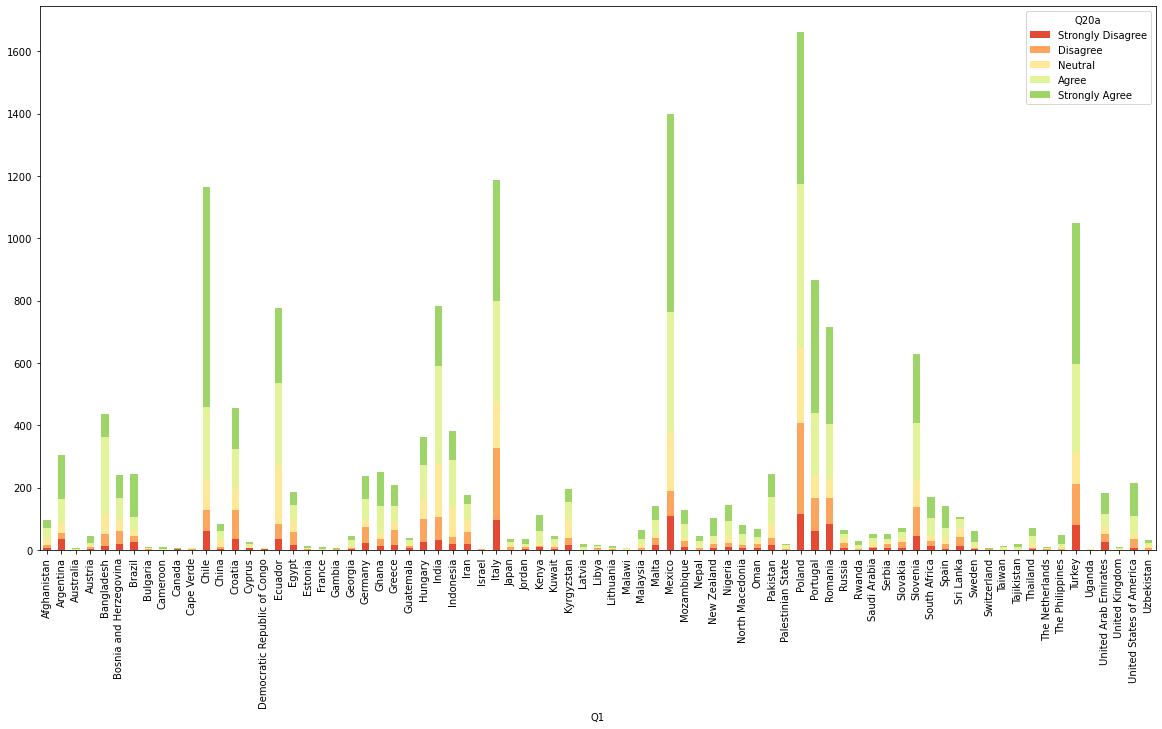

In [68]:
df2[['Strongly Disagree','Disagree','Neutral','Agree', 'Strongly Agree']].plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [80]:
t6 = df2.loc[['India','Poland','Chile','Italy','Mexico','United States of America']]

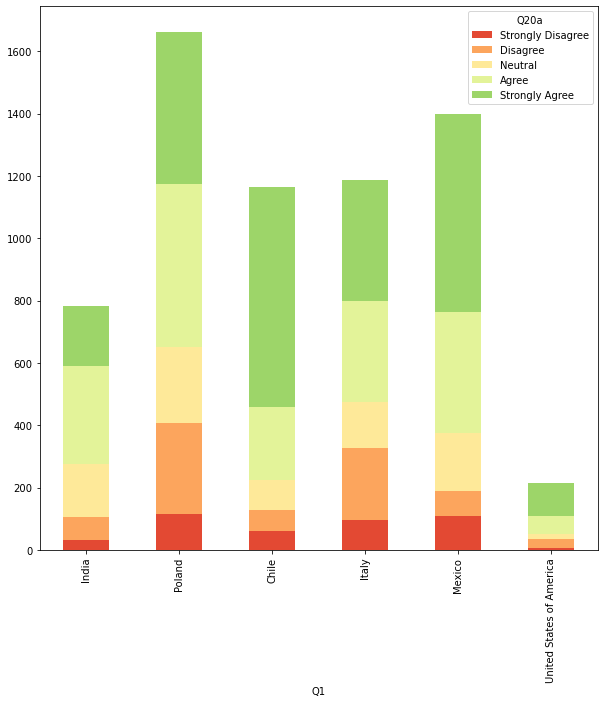

In [82]:
t6[['Strongly Disagree','Disagree','Neutral','Agree', 'Strongly Agree']].plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(10, 10)
plt.show()

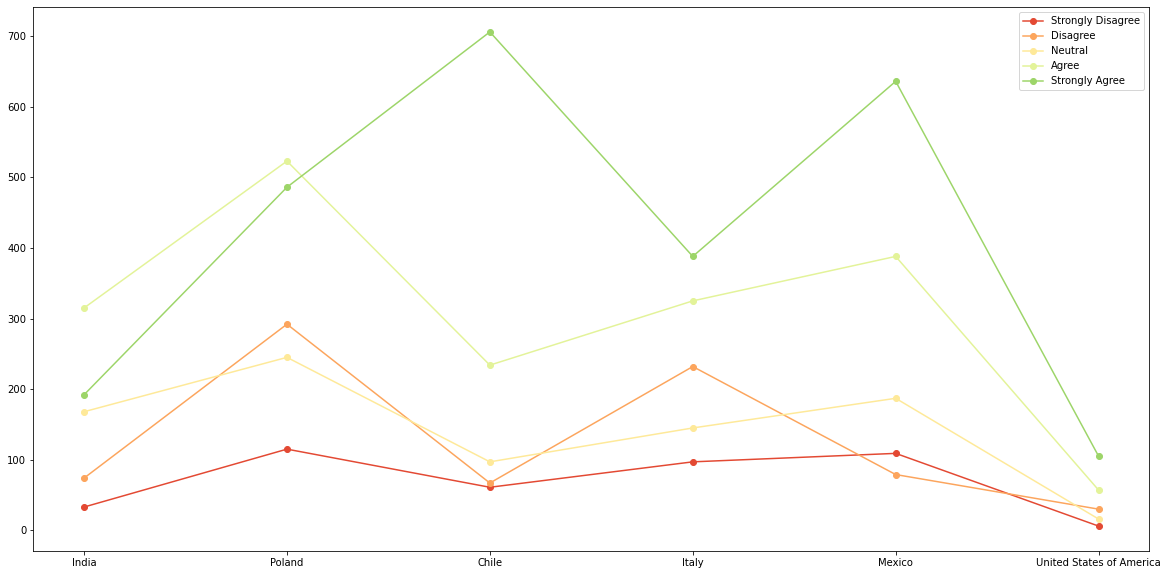

In [92]:
plt.plot(t6.index,t6['Strongly Disagree'],marker='o',label='Strongly Disagree')
plt.plot(t6.index,t6['Disagree'],marker='o',label='Disagree')
plt.plot(t6.index,t6['Neutral'],marker='o',label='Neutral')
plt.plot(t6.index,t6['Agree'],marker='o',label='Agree')
plt.plot(t6.index,t6['Strongly Agree'],marker='o',label = 'Strongly Agree')
plt.gcf().set_size_inches(20, 10)
plt.legend()
plt.show()

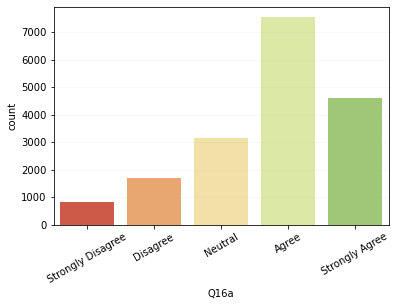

In [120]:
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q16a',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

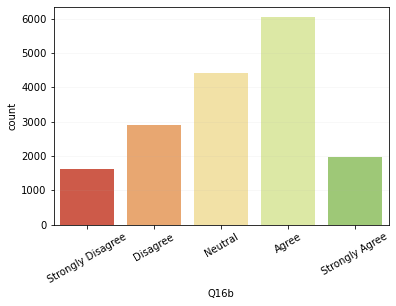

In [121]:
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q16b',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

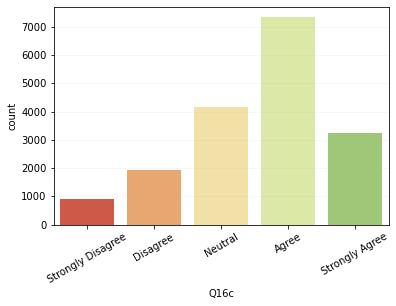

In [122]:
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q16c',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

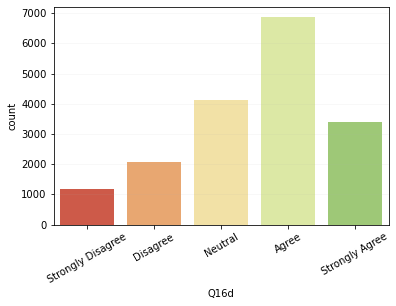

In [123]:
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q16d',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

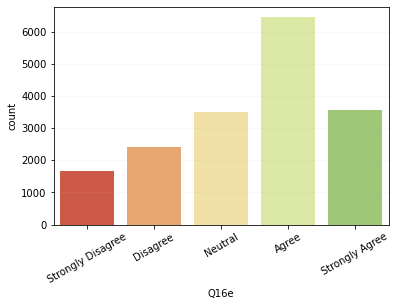

In [124]:
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q16e',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

In [127]:
df_world['Q18a'] = df_world['Q18a'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q18a'] = df_world['Q18a'].replace(['Disagree'],'Dissatisfied')
df_world['Q18a'] = df_world['Q18a'].replace(['Neutral'],'Neutral')
df_world['Q18a'] = df_world['Q18a'].replace(['Agree'],'Satisfied')
df_world['Q18a'] = df_world['Q18a'].replace(['Strongly Agree'],'Very Satisfied')

In [130]:
df_world['Q18b'] = df_world['Q18b'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q18b'] = df_world['Q18b'].replace(['Disagree'],'Dissatisfied')
df_world['Q18b'] = df_world['Q18b'].replace(['Neutral'],'Neutral')
df_world['Q18b'] = df_world['Q18b'].replace(['Agree'],'Satisfied')
df_world['Q18b'] = df_world['Q18b'].replace(['Strongly Agree'],'Very Satisfied')

In [131]:
df_world['Q18c'] = df_world['Q18c'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q18c'] = df_world['Q18c'].replace(['Disagree'],'Dissatisfied')
df_world['Q18c'] = df_world['Q18c'].replace(['Neutral'],'Neutral')
df_world['Q18c'] = df_world['Q18c'].replace(['Agree'],'Satisfied')
df_world['Q18c'] = df_world['Q18c'].replace(['Strongly Agree'],'Very Satisfied')

In [139]:
df_world['Q19a'] = df_world['Q19a'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19a'] = df_world['Q19a'].replace(['Disagree'],'Dissatisfied')
df_world['Q19a'] = df_world['Q19a'].replace(['Neutral'],'Neutral')
df_world['Q19a'] = df_world['Q19a'].replace(['Agree'],'Satisfied')
df_world['Q19a'] = df_world['Q19a'].replace(['Strongly Agree'],'Very Satisfied')

In [140]:
df_world['Q19b'] = df_world['Q19b'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19b'] = df_world['Q19b'].replace(['Disagree'],'Dissatisfied')
df_world['Q19b'] = df_world['Q19b'].replace(['Neutral'],'Neutral')
df_world['Q19b'] = df_world['Q19b'].replace(['Agree'],'Satisfied')
df_world['Q19b'] = df_world['Q19b'].replace(['Strongly Agree'],'Very Satisfied')

In [141]:
df_world['Q19c'] = df_world['Q19c'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19c'] = df_world['Q19c'].replace(['Disagree'],'Dissatisfied')
df_world['Q19c'] = df_world['Q19c'].replace(['Neutral'],'Neutral')
df_world['Q19c'] = df_world['Q19c'].replace(['Agree'],'Satisfied')
df_world['Q19c'] = df_world['Q19c'].replace(['Strongly Agree'],'Very Satisfied')

In [142]:
df_world['Q19d'] = df_world['Q19d'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19d'] = df_world['Q19d'].replace(['Disagree'],'Dissatisfied')
df_world['Q19d'] = df_world['Q19d'].replace(['Neutral'],'Neutral')
df_world['Q19d'] = df_world['Q19d'].replace(['Agree'],'Satisfied')
df_world['Q19d'] = df_world['Q19d'].replace(['Strongly Agree'],'Very Satisfied')

In [143]:
df_world['Q19e'] = df_world['Q19e'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19e'] = df_world['Q19e'].replace(['Disagree'],'Dissatisfied')
df_world['Q19e'] = df_world['Q19e'].replace(['Neutral'],'Neutral')
df_world['Q19e'] = df_world['Q19e'].replace(['Agree'],'Satisfied')
df_world['Q19e'] = df_world['Q19e'].replace(['Strongly Agree'],'Very Satisfied')

In [144]:
df_world['Q19f'] = df_world['Q19f'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19f'] = df_world['Q19f'].replace(['Disagree'],'Dissatisfied')
df_world['Q19f'] = df_world['Q19f'].replace(['Neutral'],'Neutral')
df_world['Q19f'] = df_world['Q19f'].replace(['Agree'],'Satisfied')
df_world['Q19f'] = df_world['Q19f'].replace(['Strongly Agree'],'Very Satisfied')

In [145]:
df_world['Q19g'] = df_world['Q19g'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19g'] = df_world['Q19g'].replace(['Disagree'],'Dissatisfied')
df_world['Q19g'] = df_world['Q19g'].replace(['Neutral'],'Neutral')
df_world['Q19g'] = df_world['Q19g'].replace(['Agree'],'Satisfied')
df_world['Q19g'] = df_world['Q19g'].replace(['Strongly Agree'],'Very Satisfied')

In [146]:
df_world['Q19h'] = df_world['Q19h'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19h'] = df_world['Q19h'].replace(['Disagree'],'Dissatisfied')
df_world['Q19h'] = df_world['Q19h'].replace(['Neutral'],'Neutral')
df_world['Q19h'] = df_world['Q19h'].replace(['Agree'],'Satisfied')
df_world['Q19h'] = df_world['Q19h'].replace(['Strongly Agree'],'Very Satisfied')

In [147]:
df_world['Q19i'] = df_world['Q19i'].replace(['Strongly Disagree'],'Very Dissatisfied')
df_world['Q19i'] = df_world['Q19i'].replace(['Disagree'],'Dissatisfied')
df_world['Q19i'] = df_world['Q19i'].replace(['Neutral'],'Neutral')
df_world['Q19i'] = df_world['Q19i'].replace(['Agree'],'Satisfied')
df_world['Q19i'] = df_world['Q19i'].replace(['Strongly Agree'],'Very Satisfied')

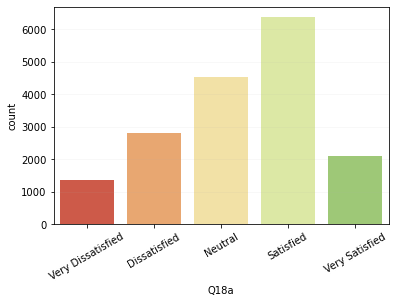

In [129]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q18a',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

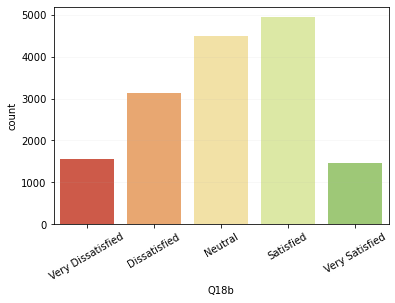

In [132]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q18b',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

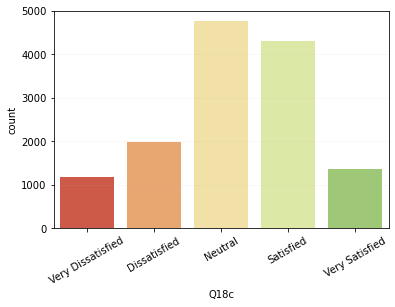

In [133]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q18c',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

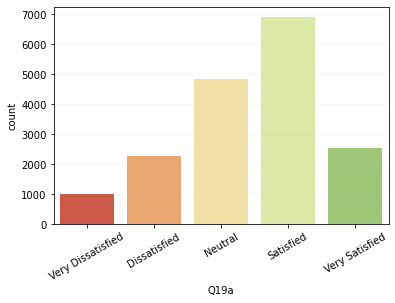

In [148]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19a',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

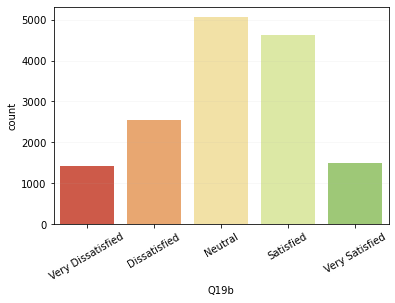

In [149]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19b',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

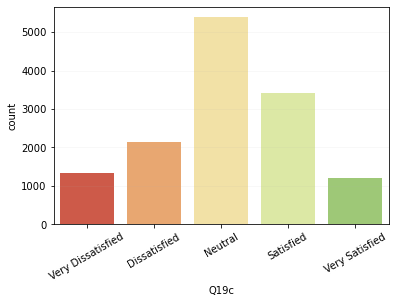

In [150]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19c',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

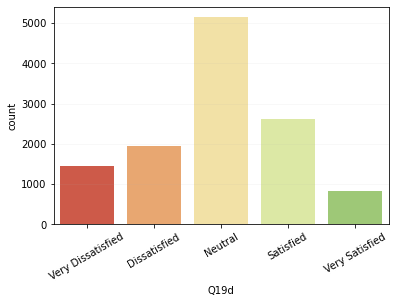

In [151]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19d',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

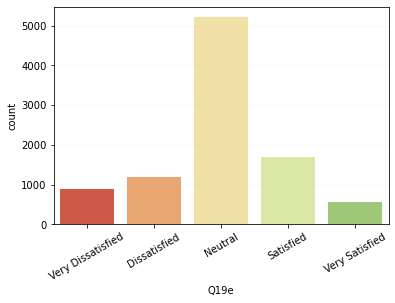

In [152]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19e',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

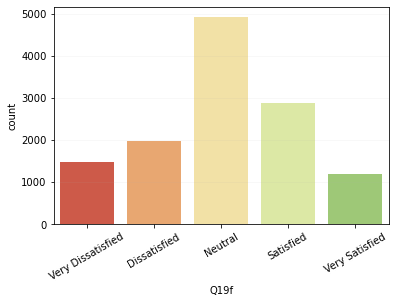

In [153]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19f',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

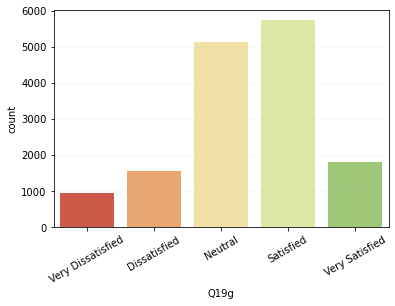

In [154]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19g',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

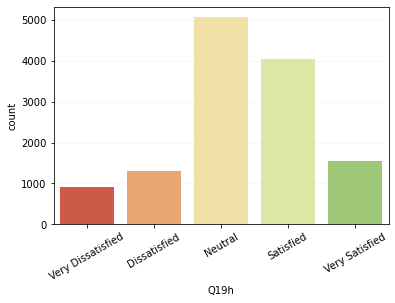

In [155]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19h',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

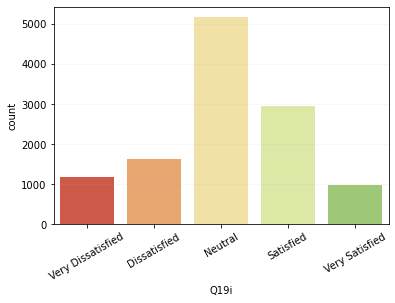

In [156]:
sort = ['Very Dissatisfied','Dissatisfied','Neutral','Satisfied','Very Satisfied'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q19i',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.grid(alpha=0.1,axis='y')
plt.show()

In [4]:
df_delhi = pd.read_csv('COVID-19 Survey Student Responses.csv')
df_delhi

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [44]:
df_delhi_box = df_delhi[['Time spent on Online Class','Time spent on self study','Time spent on fitness','Time spent on social media']]
df_delhi_melt = pd.melt(df_delhi_box)
df_delhi_melt

,variable,value
0,Time spent on Online Class,2.0
1,Time spent on Online Class,0.0
2,Time spent on Online Class,7.0
3,Time spent on Online Class,3.0
4,Time spent on Online Class,3.0
...,...,...
4723,Time spent on social media,1.0
4724,Time spent on social media,1.0
4725,Time spent on social media,3.0
4726,Time spent on social media,0.5


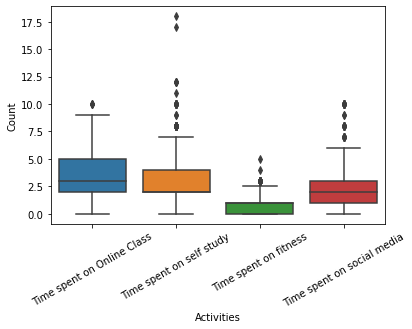

In [50]:
sns.boxplot(x='variable', y='value' ,data=df_delhi_melt)
plt.xticks(rotation=30)
plt.xlabel('Activities')
plt.ylabel('Count')
plt.show()

In [130]:
df_delhi_sl = df_delhi[(df_delhi['Medium for online class']=='Smartphone') | (df_delhi['Medium for online class']=='Laptop/Desktop')]
df_smart = df_delhi_sl[df_delhi_sl['Medium for online class']=='Smartphone']
df_lap = df_delhi_sl[df_delhi_sl['Medium for online class']=='Laptop/Desktop']

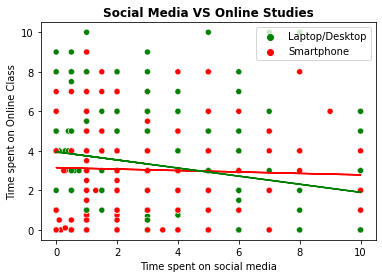

In [161]:
sns.scatterplot(x = 'Time spent on social media', y = 'Time spent on Online Class', data = df_delhi_sl, hue='Medium for online class', palette=['green','red'])
m, b = np.polyfit(df_smart['Time spent on social media'], df_smart['Time spent on Online Class'], 1)
n, c = np.polyfit(df_lap['Time spent on social media'], df_lap['Time spent on Online Class'], 1)
plt.plot(df_smart['Time spent on social media'], m*df_smart['Time spent on social media']+b,color='red')
plt.plot(df_lap['Time spent on social media'], n*df_lap['Time spent on social media']+c,color='green')
plt.legend(loc=1)
plt.title('Social Media VS Online Studies',fontsize=12, fontweight="bold")
plt.savefig('Social_mediaVSOnlone_class.png',dpi=300,bbox_inches='tight')
plt.show()

In [112]:
df_delhi_sl.groupby('Medium for online class').mean('Time spent on Online Class')

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
Medium for online class,,,,,,,
Laptop/Desktop,21.343119,3.434771,3.170642,0.714128,7.782569,2.514404,2.990826
Smartphone,19.187384,3.068831,2.670686,0.799443,7.932282,2.219666,2.860853


In [124]:
df_delhi.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [133]:
df_lap = df_delhi_sl[df_delhi_sl['Medium for online class']=='Laptop/Desktop']
df_lap.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
8,R9,Delhi-NCR,21,3.0,Very poor,Laptop/Desktop,4.0,1.0,8.0,2.0,Whatsapp,1,3,Increased,NO,Online surfing,NO,NO,"Friends , relatives"
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college


<AxesSubplot:xlabel='Time spent on Online Class', ylabel='Time spent on sleep'>

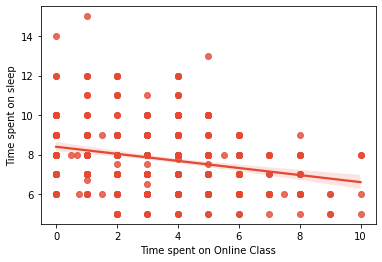

In [137]:
sns.regplot(x='Time spent on Online Class', y='Time spent on sleep', data= df_lap)

In [65]:
df1=df_world
df1.tail()

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q10c,Q10d,Q10e,Q11,Q12a,Q12b,Q12c,Q12d,Q12e,Q13,Q14a,Q14b,Q14c,Q14d,Q14e,Q15,Q16a,Q16b,Q16c,Q16d,Q16e,Q17,Q18a,Q18b,Q18c,Q19a,Q19b,Q19c,Q19d,Q19e,Q19f,Q19g,Q19h,Q19i,Q20a,Q20b,Q20c,Q20d,Q20e,Q20f,Q21a,Q21b,Q21c,Q21d,Q21e,Q21f,Q21g,Q21h,Q21i,Q21j,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q23a,Q23b,Q23c,Q23d,Q23e,Q23f,Q23g,Q23h,Q23i,Q23j,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q24h,Q25a,Q25b,Q25c,Q25d,Q25e,Q25f,Q25g,Q25h,Q25i,Q25j,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26j,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35a,Q35b,Q35c,Q35d,Q36a,Q36b,Q36c,Q36d,Q36e,Q36f,Q36g,Q36h,Q36i,Q36j,Q37,Q38a_1,Q38b_1,Q38c_1,Q38d_1,Q38e_1,Q38f_1,Q38g_1,Q38h_1,Q38i_1,Q38j_1,Q38k_1,Q38l_1,Q38m_1,Q38n_1,Q38o_1,Q38p_1,Q38a_2,Q38b_2,Q38c_2,Q38d_2,Q38e_2,Q38f_2,Q38g_2,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
30895,Uzbekistan,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,19.0,Strongly Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Strongly Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,0.0,0.0,Strongly Disagree,0.0,0.0,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Disagree,Disagree,NaN,Neutral,Neutral,Neutral,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
30896,Uzbekistan,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,21.0,Disagree,Disagree,NaN,Agree,NaN,Agree,Agree,Disagree,NaN,Agree,NaN,Agree,Agree,Agree,0.0,Strongly Disagree,Strongly Disagree,Strongly Disagree,0.0,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
30897,Uzbekistan,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,35.0,Agree,Disagree,Disagree,Disagree,Disagree,Neutral,Disagree,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,NaN,0.0,0.0,0.0,0.0,Strongly Disagree,Strongly Agree,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,6.0,Agree,Neutral,Agree,Disagree,Neutral,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Strongly Disagree,Strongly Disagree,Neutral,Strongly Disagree,Disagree,Neutral,Disagree,Agree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Disagree,Neutral,Disagree,Strongly Disagree,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Agree,Disagree,Neutral,Dis

In [96]:
d = df_world.groupby('Q20a').size()
d

Q20a
Agree                5027
Disagree             2159
Neutral              2358
Strongly Agree       6307
Strongly Disagree    1218
dtype: int64

In [94]:
total = df_world.groupby('Q20a').size().sum()
d = df_world.groupby('Q20a').size()
(d.div(total)*100).round(2)

Q20a
Agree                29.45
Disagree             12.65
Neutral              13.81
Strongly Agree       36.95
Strongly Disagree     7.14
dtype: float64

/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/126476667.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0,1318], s='7.14%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/126476667.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[1,2259], s='12.65%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/126476667.py:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[2,2458], s='13.81%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n

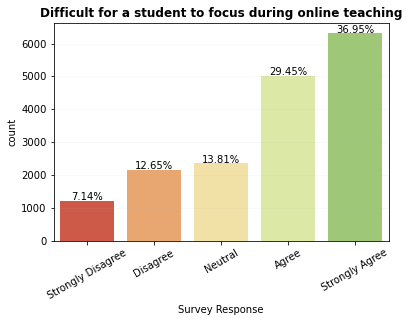

In [123]:
#because it is difficult to focus during online classes, the performance of students has drstically declined
sort = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree'] 
sns.set_palette('RdYlGn')
sns.countplot(x='Q20a',data=df_world, order =sort)
plt.xticks(rotation=30)
plt.title('Difficult for a student to focus during online teaching',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.annotate(xy=[0,1318], s='7.14%',ha='center', va='center')
plt.annotate(xy=[1,2259], s='12.65%',ha='center', va='center')
plt.annotate(xy=[2,2458], s='13.81%',ha='center', va='center')
plt.annotate(xy=[3,5127], s='29.45%',ha='center', va='center')
plt.annotate(xy=[4,6407], s='36.95%',ha='center', va='center')
#plt.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.grid(alpha=0.1,axis='y')
plt.savefig('Difficult for a student to focus during online teaching.png',dpi=300,bbox_inches='tight')
plt.show()

In [144]:
d = df_world.groupby('Q20b').size()
d

Q20b
Agree                2449
Disagree             4803
Neutral              5144
Strongly Agree        823
Strongly Disagree    3613
dtype: int64

In [145]:
total = df_world.groupby('Q20b').size().sum()
d = df_world.groupby('Q20b').size()
(d.div(total)*100).round(2)

Q20b
Agree                14.55
Disagree             28.53
Neutral              30.56
Strongly Agree        4.89
Strongly Disagree    21.47
dtype: float64

/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/878525215.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0,3713], s='21.47%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/878525215.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[1,4903], s='28.53%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/878525215.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[2,5244], s='30.56%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n

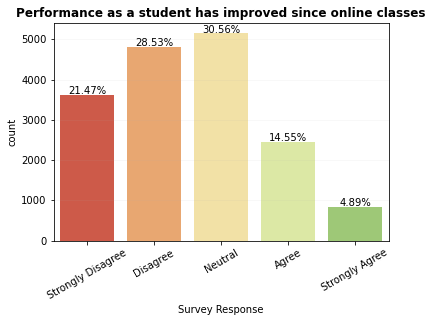

In [148]:
sns.countplot(x='Q20b',data=df_world, order = sort)
plt.xticks(rotation=30)
plt.title('Performance as a student has improved since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.annotate(xy=[0,3713], s='21.47%',ha='center', va='center')
plt.annotate(xy=[1,4903], s='28.53%',ha='center', va='center')
plt.annotate(xy=[2,5244], s='30.56%',ha='center', va='center')
plt.annotate(xy=[3,2549], s='14.55%',ha='center', va='center')
plt.annotate(xy=[4,923], s='4.89%',ha='center', va='center')
plt.savefig('Performance of a student has improved since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

In [149]:
d = df_world.groupby('Q20c').size()
d

Q20c
Agree                4697
Disagree             3014
Neutral              4770
Strongly Agree       2720
Strongly Disagree    1620
dtype: int64

In [150]:
total = df_world.groupby('Q20c').size().sum()
d = df_world.groupby('Q20c').size()
(d.div(total)*100).round(2)

Q20c
Agree                27.92
Disagree             17.92
Neutral              28.36
Strongly Agree       16.17
Strongly Disagree     9.63
dtype: float64

/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/174370365.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0,1720], s='9.63%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/174370365.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[1,3114], s='17.92%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/174370365.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[2,4870], s='28.36%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n9

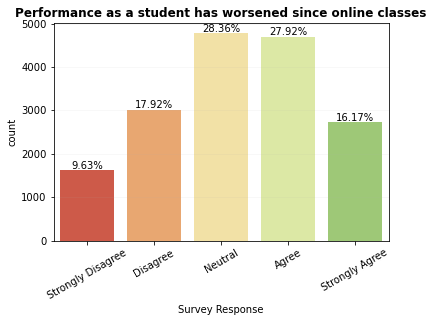

In [153]:
sns.countplot(x='Q20c',data=df_world, order=sort)
plt.xticks(rotation=30)
plt.title('Performance as a student has worsened since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.annotate(xy=[0,1720], s='9.63%',ha='center', va='center')
plt.annotate(xy=[1,3114], s='17.92%',ha='center', va='center')
plt.annotate(xy=[2,4870], s='28.36%',ha='center', va='center')
plt.annotate(xy=[3,4797], s='27.92%',ha='center', va='center')
plt.annotate(xy=[4,2820], s='16.17%',ha='center', va='center')
plt.savefig('Performance as a student has worsened since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

In [159]:
d = df_world.groupby('Q17').size()
d

Q17
larger                   6010
significantly larger     4125
significantly smaller    1637
smaller                  2841
the same                 4519
dtype: int64

In [160]:
total = df_world.groupby('Q17').size().sum()
d = df_world.groupby('Q17').size()
(d.div(total)*100).round(2)

Q17
larger                   31.41
significantly larger     21.56
significantly smaller     8.56
smaller                  14.85
the same                 23.62
dtype: float64

/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/1774680355.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0,1737], s='8.56%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/1774680355.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[1,2941], s='14.85%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/1774680355.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[2,4619], s='23.62%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y

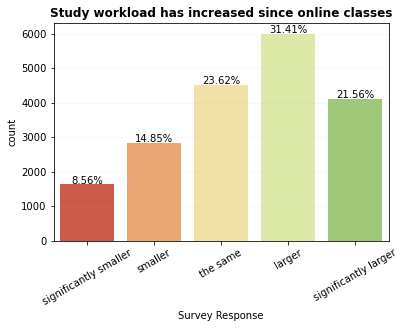

In [163]:
sort1 = ['significantly smaller','smaller','the same','larger','significantly larger']
sns.countplot(x='Q17',data=df_world, order = sort1)
plt.xticks(rotation=30)
plt.title('Study workload has increased since online classes',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.annotate(xy=[0,1737], s='8.56%',ha='center', va='center')
plt.annotate(xy=[1,2941], s='14.85%',ha='center', va='center')
plt.annotate(xy=[2,4619], s='23.62%',ha='center', va='center')
plt.annotate(xy=[3,6110], s='31.41%',ha='center', va='center')
plt.annotate(xy=[4,4225], s='21.56%',ha='center', va='center')
plt.savefig('Study workload has increased since online classes.png',dpi=300,bbox_inches='tight')
plt.show()

In [167]:
d = df_world.groupby('Q20d').size()
d

Q20d
Agree                5601
Disagree             2996
Neutral              4784
Strongly Agree       1969
Strongly Disagree    1605
dtype: int64

In [168]:
total = df_world.groupby('Q20d').size().sum()
d = df_world.groupby('Q20d').size()
(d.div(total)*100).round(2)

Q20d
Agree                33.03
Disagree             17.67
Neutral              28.22
Strongly Agree       11.61
Strongly Disagree     9.47
dtype: float64

/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/2714121781.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0,1705], s='9.47%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/2714121781.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[1,3096], s='17.67%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y1n97m0000gn/T/ipykernel_35045/2714121781.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[2,4884], s='28.22%',ha='center', va='center')
/var/folders/18/fg0d_gb149j6wzff78y

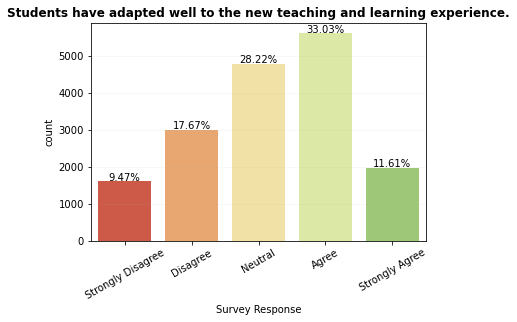

In [170]:
sns.countplot(x='Q20d',data=df_world,order=sort)
plt.xticks(rotation=30)
plt.title('Students have adapted well to the new teaching and learning experience.',fontsize=12, fontweight="bold")
plt.xlabel('Survey Response')
plt.grid(alpha=0.1,axis='y')
plt.annotate(xy=[0,1705], s='9.47%',ha='center', va='center')
plt.annotate(xy=[1,3096], s='17.67%',ha='center', va='center')
plt.annotate(xy=[2,4884], s='28.22%',ha='center', va='center')
plt.annotate(xy=[3,5701], s='33.03%',ha='center', va='center')
plt.annotate(xy=[4,2069], s='11.61%',ha='center', va='center')
plt.savefig('Students have adapted well to the new teaching and learning experience.png',dpi=300,bbox_inches='tight')
plt.show()

In [171]:
df_delhi

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [ ]:
t6[['Strongly Disagree','Disagree','Neutral','Agree', 'Strongly Agree']].plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(10, 10)
plt.show()

In [228]:
df_world['Q25d'] = df_world['Q25d'].replace(['Strongly Disagree'],'Never')
df_world['Q25d'] = df_world['Q25d'].replace(['Disagree'],'Rarely')
df_world['Q25d'] = df_world['Q25d'].replace(['Neutral'],'Sometimes')
df_world['Q25d'] = df_world['Q25d'].replace(['Agree'],'Often')
df_world['Q25d'] = df_world['Q25d'].replace(['Strongly Agree'],'Always')

In [173]:
df_world['Q25a'] = df_world['Q25a'].replace(['Strongly Disagree'],'Never')
df_world['Q25a'] = df_world['Q25a'].replace(['Disagree'],'Rarely')
df_world['Q25a'] = df_world['Q25a'].replace(['Neutral'],'Sometimes')
df_world['Q25a'] = df_world['Q25a'].replace(['Agree'],'Often')
df_world['Q25a'] = df_world['Q25a'].replace(['Strongly Agree'],'Always')

In [174]:
df_world['Q25j'] = df_world['Q25j'].replace(['Strongly Disagree'],'Never')
df_world['Q25j'] = df_world['Q25j'].replace(['Disagree'],'Rarely')
df_world['Q25j'] = df_world['Q25j'].replace(['Neutral'],'Sometimes')
df_world['Q25j'] = df_world['Q25j'].replace(['Agree'],'Often')
df_world['Q25j'] = df_world['Q25j'].replace(['Strongly Agree'],'Always')

In [191]:
df_world

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q10c,Q10d,Q10e,Q11,Q12a,Q12b,Q12c,Q12d,Q12e,Q13,Q14a,Q14b,Q14c,Q14d,Q14e,Q15,Q16a,Q16b,Q16c,Q16d,Q16e,Q17,Q18a,Q18b,Q18c,Q19a,Q19b,Q19c,Q19d,Q19e,Q19f,Q19g,Q19h,Q19i,Q20a,Q20b,Q20c,Q20d,Q20e,Q20f,Q21a,Q21b,Q21c,Q21d,Q21e,Q21f,Q21g,Q21h,Q21i,Q21j,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q23a,Q23b,Q23c,Q23d,Q23e,Q23f,Q23g,Q23h,Q23i,Q23j,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q24h,Q25a,Q25b,Q25c,Q25d,Q25e,Q25f,Q25g,Q25h,Q25i,Q25j,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26j,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35a,Q35b,Q35c,Q35d,Q36a,Q36b,Q36c,Q36d,Q36e,Q36f,Q36g,Q36h,Q36i,Q36j,Q37,Q38a_1,Q38b_1,Q38c_1,Q38d_1,Q38e_1,Q38f_1,Q38g_1,Q38h_1,Q38i_1,Q38j_1,Q38k_1,Q38l_1,Q38m_1,Q38n_1,Q38o_1,Q38p_1,Q38a_2,Q38b_2,Q38c_2,Q38d_2,Q38e_2,Q38f_2,Q38g_2,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
0,Afghanistan,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,62.0,Neutral,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,0.0,0.0,0.0,0.0,Strongly Disagree,NaN,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,Neutral,significantly larger,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Disagree,Agree,Disagree,Strongly Disagree,Neutral,Neutral,Strongly Disagree,Strongly Disagree,Neutral,Agree,Disagree,Strongly Agree,Strongly Disagree,6.0,6.0,Disagree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,6.0,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Never,Strongly Disagree,Never,Agree,Agree,Strongly Agree,Neutral,Strongly Disagree,Strongly Agree,Always,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Neutral,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Neutral,Strongly Disagree,Neutral,Neutral,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Agree,Disagree,Disagree,Strongly Agree,Agree,Agree,Disagree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Agree,Neutral,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Disagree,pt
1,Afghanistan,Disagree,Strongly Disagree,Neutral,Agree,NaN,Neutral,Disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
2,Afghanistan,Strongly Disagree,Disagree,Strongly Disagree,Strongly Disagree,28.0,Strongly Disagree,Strongly Disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Disagree,Neutral,Agree,Strongly Di

In [6]:
df3 = df_world[['Q25d','Q25a','Q25j']]
df3

,Q25d,Q25a,Q25j
0,Agree,Strongly Disagree,Strongly Agree
1,NaN,NaN,NaN
2,NaN,Strongly Disagree,Neutral
3,NaN,NaN,NaN
4,Agree,Neutral,Disagree
...,...,...,...
30895,Strongly Agree,Strongly Disagree,Agree
30896,NaN,NaN,NaN
30897,Agree,Disagree,Strongly Agree
30898,Agree,Neutral,Neutral


In [213]:
a = df_world.groupby('Q25a').size()
a

Q25a
Always       1161
Never        2497
Often        4599
Rarely       4590
Sometimes    8090
dtype: int64

In [232]:
c = df_world.groupby('Q25d').size()
c

Q25d
Always       2668
Never        1291
Often        7296
Rarely       3031
Sometimes    6585
dtype: int64

In [211]:
j = df_world.groupby('Q25j').size()
j

Q25j
Always       3421
Never        2026
Often        5847
Rarely       3160
Sometimes    6449
dtype: int64

Text(0, 0.5, 'Number of students')

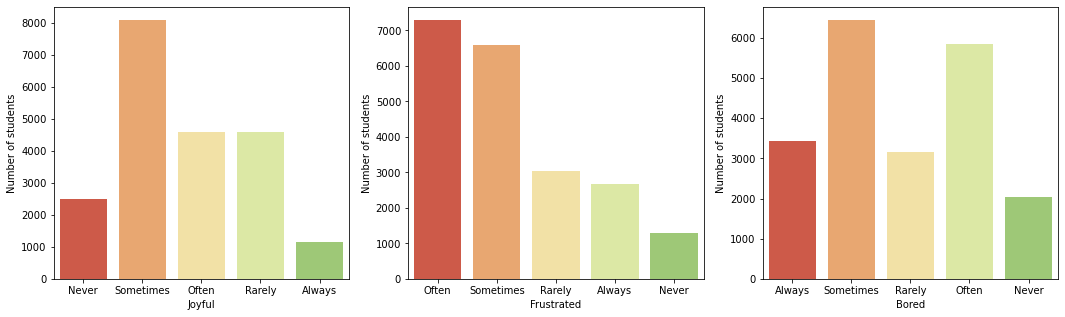

In [237]:
fig, (ax0,ax1,ax2)=plt.subplots(1,3)
sns.countplot(ax=ax0,x='Q25a',data=df3)
sns.countplot(ax=ax1,x='Q25d',data=df3)
sns.countplot(ax=ax2,x='Q25j',data=df3)
plt.gcf().set_size_inches(18, 5)
ax0.set_xlabel('Joyful')
ax1.set_xlabel('Frustrated')
ax2.set_xlabel('Bored')
ax0.set_ylabel('Number of students')
ax1.set_ylabel('Number of students')
ax2.set_ylabel('Number of students')

In [ ]:
total = df_world.groupby('Q20c').size().sum()
d = df_world.groupby('Q20c').size()
(d.div(total)*100).round(2)

In [8]:
print(df3.groupby(['Q25d','Q25a','Q25j']).size().reset_index())

                  Q25d               Q25a               Q25j    0
0                Agree              Agree              Agree  412
1                Agree              Agree           Disagree  158
2                Agree              Agree            Neutral  318
3                Agree              Agree     Strongly Agree  115
4                Agree              Agree  Strongly Disagree   85
..                 ...                ...                ...  ...
120  Strongly Disagree  Strongly Disagree              Agree   23
121  Strongly Disagree  Strongly Disagree           Disagree   20
122  Strongly Disagree  Strongly Disagree            Neutral   46
123  Strongly Disagree  Strongly Disagree     Strongly Agree   56
124  Strongly Disagree  Strongly Disagree  Strongly Disagree  151

[125 rows x 4 columns]


In [ ]:
df_world['Q20c'] = df_world['Q20c'] / (t['total_bill'] - tips['tip'])